In [4]:
import requests
import bs4
import time
import random

In [5]:
my_headers={"referer": "https://www.coupang.com/np/categories/393760",
     "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36"
}

In [6]:
total_data_list=[]
for page_number in range (1,18):
    url="https://www.coupang.com/np/categories/420266?channel=plp_C2&page={}".format(page_number)
    res = requests.get(url=url, headers=my_headers)
    
    soup=bs4.BeautifulSoup(res.text)
    
    div_elements =soup.select("dd.descriptions > div.name")
    for e in div_elements:
        div_elements = e
        data_list=[]
        data_list.append(div_elements.text.strip())
        total_data_list.append(data_list)
    time.sleep(1)

In [10]:
total_data_list

[['국내산 전복 선물세트 12미, 1kg, 1세트'],
 ['장대굴비 선물세트 20미 + 부직포가방, 2kg, 1개'],
 ['영광 법성포 굴비 20마리 + 쇼핑백, 1.5kg, 1세트'],
 ['단디프레시 마음담은 국산 데친 문어, 1.5kg, 1마리'],
 ['영광법성포 부세 보리굴비 10미 29~32cm 특대 + 쇼핑백, 1세트'],
 ['영광 법성포 고추장 굴비(냉동), 400g, 2병'],
 ['은하수산 찰스장 해피하트 연어필렛 300g x 2p + 케이퍼 홀스래디쉬소스 60g x 2p + 보냉백 선물세트, 1세트'],
 ['다미원씨푸드 법성포 프리미엄 굴비 (냉동), 1.5kg(5미), 1개'],
 ['영광법성포 다복 굴비 세트 10미 (냉동), 1박스'],
 ['곰곰 노르웨이 간고등어살 1kg, 1개'],
 ['살맛나요 보령 남성호에서 잡아 냉풍건조한 멸치 3종세트 (냉동), 1kg, 1세트'],
 ['제주 명품 갈치세트 (냉동), 1.2kg, 1개'],
 ['엠수산 생새우살 (냉동), 200g (28~38 마리), 1개'],
 ['단디프레시 한마리 데친 문어, 1.5kg, 1개'],
 ['다복 청정바다를 담은 활전복 1kg, 중(17~20미), 1개'],
 ['곰곰 김자반, 70g, 4개'],
 ['숙성 연어회, 200g, 1개'],
 ['아라보감 산소 품은 국산 전복 1kg, 중(14~16미), 1개'],
 ['프라이드 흰다리새우살 (냉동), 300g (22~26 마리), 2개'],
 ['성경식품 지도표 참 돌자반, 80g, 4개'],
 ['아라보감 산소 품은 국산 전복 1kg, 중(17~20미), 1개'],
 ['해맑은푸드 백진미채 (냉동), 400g, 1봉'],
 ['아라보감 산소 품은 국산 전복 1kg, 꼬마(22~30미), 1개'],
 ['다복 청정바다를 담은 활전복 1kg, 중(13~14미), 1개'],
 ['제주 순살 고등어 (냉동), 150g, 4팩'],
 ['다복 청정바다를 담은 활전복 1kg, 중(15~16마리), 1개'],


In [7]:
import pandas as pd
df=pd.DataFrame(total_data_list)

In [8]:
df.to_csv('wordtext2.txt',index=False)

In [9]:
from konlpy.tag import Twitter 
from collections import Counter

In [11]:
file = open('wordtext2.txt', 'r', encoding="UTF-8")

lists = file.readlines()

file.close()

#lists

In [12]:
twitter = Twitter() 
morphs = [] 

for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 
print(morphs)

C:\Users\win10\anaconda3\envs\javaEdu\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[[('0', 'Number'), ('\n', 'Foreign')], [('"', 'Punctuation'), ('국내', 'Noun'), ('산', 'Noun'), ('전복', 'Noun'), ('선물', 'Noun'), ('세트', 'Noun'), ('12', 'Number'), ('미', 'Adjective'), (',', 'Punctuation'), ('1', 'Number'), ('kg', 'Alpha'), (',', 'Punctuation'), ('1', 'Number'), ('세트', 'Noun'), ('"', 'Punctuation'), ('\n', 'Foreign')], [('"', 'Punctuation'), ('장대', 'Noun'), ('굴비', 'Noun'), ('선물', 'Noun'), ('세트', 'Noun'), ('20', 'Number'), ('미', 'Adjective'), ('+', 'Punctuation'), ('부직포', 'Noun'), ('가방', 'Noun'), (',', 'Punctuation'), ('2', 'Number'), ('kg', 'Alpha'), (',', 'Punctuation'), ('1', 'Number'), ('개', 'Noun'), ('"', 'Punctuation'), ('\n', 'Foreign')], [('"', 'Punctuation'), ('영광', 'Noun'), ('법성포', 'Noun'), ('굴비', 'Noun'), ('20', 'Number'), ('마리', 'Noun'), ('+', 'Punctuation'), ('쇼핑', 'Noun'), ('백', 'Suffix'), (',', 'Punctuation'), ('1.5', 'Number'), ('kg', 'Alpha'), (',', 'Punctuation'), ('1', 'Number'), ('세트', 'Noun'), ('"', 'Punctuation'), ('\n', 'Foreign')], [('"', 'Punctuation'

In [13]:
noun_adj_adv_list=[] 
for sentence in morphs : 
    for word, tag in sentence : 
        if tag in ['Noun'] and ("팩" not in word)and("산" not in word)and("것" not in word)and("냉동" not in word)and("개" not in word)and("냉장" not in word)and("용" not in word)and ("내" not in word)and ("나" not in word)and ("수"not in word) and("게"not in word)and("말"not in word): 
            noun_adj_adv_list.append(word) 

print(noun_adj_adv_list)

['전복', '선물', '세트', '세트', '장대', '굴비', '선물', '세트', '부직포', '가방', '영광', '법성포', '굴비', '마리', '쇼핑', '세트', '단디', '프레', '시', '마음', '데친', '문어', '마리', '영광', '법성포', '부세', '보리', '굴비', '특대', '쇼핑', '세트', '영광', '법성포', '고추장', '굴비', '병', '은하', '찰스', '해피', '하트', '어필', '렛', '케이', '퍼', '홀스', '디쉬', '소스', '보냉', '선물', '세트', '세트', '다미', '원씨', '푸드', '법성포', '프리미엄', '굴비', '영광', '법성포', '다복', '굴비', '세트', '박스', '노르웨이', '간', '고등어', '살', '살맛', '요', '보령', '남성호', '냉', '멸치', '종', '세트', '세트', '제주', '명품', '갈치', '세트', '엠', '생', '새우', '살', '마리', '단디', '프레', '시', '마리', '데친', '문어', '다복', '청정', '바다', '활', '전복', '중', '김자', '반', '숙성', '어회', '라보', '감', '전복', '중', '프라이드', '새우', '살', '마리', '성경', '식품', '도표', '돌', '자반', '라보', '감', '전복', '중', '해', '맑은', '푸드', '진미채', '봉', '라보', '감', '전복', '꼬마', '다복', '청정', '바다', '활', '전복', '중', '다복', '청정', '바다', '활', '전복', '중', '마리', '제주', '살', '고등어', '은하', '연어', '배꼽', '살', '라보', '감', '전복', '다복', '청정', '바다', '활', '전복', '영광', '법성포', '굴비', '지하', '생굴', '쿠팡', '새우', '살', '마리', '노르웨이', '간', '고등어', '살', '싱싱특구'

In [14]:
count = Counter(noun_adj_adv_list)

In [15]:
words = dict(count.most_common())

In [16]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
import nltk 
from nltk.corpus import stopwords

In [17]:
%matplotlib inline 

import matplotlib 
from matplotlib import rc
rc('font', family='NanumBarunGothic')

In [18]:
from wordcloud import WordCloud

wordcloud = WordCloud(
    font_path = 'C:/Users/win10/workspace/font/NanumBarunGothic.ttf',    # 맥에선 한글폰트 설정 잘해야함.
    background_color='white',                             # 배경 색깔 정하기
    colormap = 'Accent_r',                                # 폰트 색깔 정하기
    width = 800,
    height = 800
)

wordcloud_words = wordcloud.generate_from_frequencies(words)

<class 'numpy.ndarray'>
(800, 800, 3)


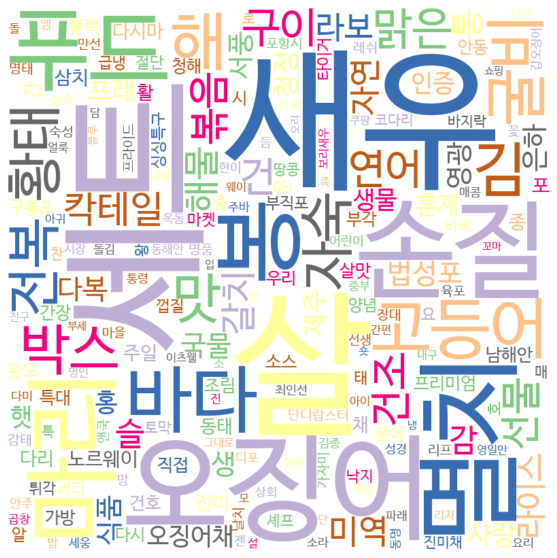

In [19]:
array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # (800, 800, 3)

fig = plt.figure(figsize=(10, 10))
plt.imshow(array, interpolation="bilinear")
plt.axis('off')
plt.show()
fig.savefig('business_anlytics_worldcloud.png')